In [ ]:
from google.colab import files
uploaded = files.upload()

Saving aerofit_treadmill.csv to aerofit_treadmill.csv


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('aerofit_treadmill.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.shape

(180, 9)

**Dataset contains 180 rows and 9 columns**



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**Product, Gender and Marital Status are object(string) Age, Education, Usage, Fitness, Income and Miles are in int64(integer)**

In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Descriptive Analysis

Total count of all columns is 180

Age: Mean age of the customer is 28 years, half of the customer's mean age is 26.

Education: Mean Education is 15 with maximum as 21 and minimum as 12.

Usage: Mean Usage per week is 3.4, with maximum as 7 and minimum as 2.

Fitness: Average rating is 3.3 on a scale of 1 to 5.

Miles: Average number of miles the customer walks is 103 with maximum distance travelled by most people is almost 115 and minimum is 21.

Income (in $): Most customer earns around 58K annually, with maximum of 104K and minimum almost 30K

In [ ]:
#Non-Graphical Analysis: Value counts and unique attributes

In [ ]:
# Total number of unique Product ids
df['Product'].nunique()

3

In [ ]:
# unique list of product ids
df['Product'].unique().tolist()

['KP281', 'KP481', 'KP781']

In [ ]:
# Total number of unique ages
total_uniq_age = df['Age'].nunique()
total_uniq_age

32

In [ ]:
# list of unique ages
df['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [ ]:
# Number of Male and Female customers
df['Gender'].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

In [ ]:
# list of unique Educations
df['Education'].unique().tolist()

[14, 15, 12, 13, 16, 18, 20, 21]

In [ ]:
# Number of customer againts the rating scale 1 to 5
df['Fitness'].value_counts().sort_index()

Fitness
1     2
2    26
3    97
4    24
5    31
Name: count, dtype: int64

In [ ]:
# Number of customers with 3 different product types
df['Product'].value_counts().sort_index()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [ ]:
# Number of customers counts on Usage
df['Usage'].value_counts().sort_index()

Usage
2    33
3    69
4    52
5    17
6     7
7     2
Name: count, dtype: int64

In [ ]:
# Number of Single and Partnered customers
df['MaritalStatus'].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64


- [ ] KP281, KP481, KP781 are the 3 different products
- [ ] Most commonly purchased treadmill product type is KP281
- [ ] There are 32 unique ages
- [ ] 104 Males and 76 Females are in the customers list
- [ ] 8 unique set of Educations (14, 15, 12, 13, 16, 18, 20, 21)
- [ ] Highest rated Fitness rating is 3
- [ ] Most customers usage treadmill atleast 3 days per week
- [ ] Majority of the customers who have purchased are Married/Partnered



**conversion of categorical attributes to 'category'**

In [ ]:
# Converting Int data type of fitness rating to object data type
df_cat = df
df_cat['Fitness_category'] = df.Fitness
df_cat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category
0,KP281,18,Male,14,Single,3,4,29562,112,4
1,KP281,19,Male,15,Single,2,3,31836,75,3
2,KP281,19,Female,14,Partnered,4,3,30699,66,3
3,KP281,19,Male,12,Single,3,3,32973,85,3
4,KP281,20,Male,13,Partnered,4,2,35247,47,2


In [ ]:
df_cat["Fitness_category"].replace({1:"Poor Shape",
                            2:"Bad Shape",
                            3:"Average Shape",
                            4:"Good Shape",
                            5:"Excellent Shape"},inplace=True)
df_cat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average Shape
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad Shape


In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**Missing Values**

In [ ]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
age_group        0
edu_group        0
income_group     0
miles_group      0
dtype: int64

In [ ]:
df.duplicated().sum()

0

**Outliers**

**Outliers for other categorical data are mentioned inline with the respective analysis**

In [ ]:
# Outlier calculation for Miles using Inter Quartile Range
q_75, q_25 = np.percentile(df['Miles'], [75 ,25])
miles_iqr = q_75 - q_25
print("Inter Quartile Range for Miles is", miles_iqr)

Inter Quartile Range for Miles is 48.75


**Statistical Summary**

In [ ]:
# for unique list of products, listed in percentage
sr = df['Product'].value_counts(normalize=True)
stat = sr.map(lambda calc: round(100*calc,2))
stat

Product
KP281    44.44
KP481    33.33
KP781    22.22
Name: proportion, dtype: float64

44.44% of customers bought KP281 product type

33.33% of customers bought KP481 product type

22.22% of customers bought KP781 product **type**

In [ ]:
# Customer Gender statistics (listed in %)
gender = df['Gender'].value_counts(normalize=True)
gender_res = gender.map(lambda calc: round(100*calc,2))
gender_res

Gender
Male      57.78
Female    42.22
Name: proportion, dtype: float64

**57.78% of customers are Male and 42.22% customers are Female**

In [ ]:
# Customers Marital Status (listed in %)
marital_status = df['MaritalStatus'].value_counts(normalize=True)
marital_status_res = marital_status.map(lambda calc:round(100*calc,2))
marital_status_res

MaritalStatus
Partnered    59.44
Single       40.56
Name: proportion, dtype: float64

59.44% of customers are Married/Partnered

40.56% of customers are Single

In [ ]:
# Usage: Number of days used per week (listed in %)
usage = df['Usage'].value_counts(normalize=True).map(lambda calc:round(100*calc,2)).reset_index()
usage.rename(columns={'index':'DaysPerWeek'},inplace=True)
usage

,Usage,proportion
0,3,38.33
1,4,28.89
2,2,18.33
3,5,9.44
4,6,3.89
5,7,1.11


Around 39% of customers use 3 days per week

Less than 2% of customers use 7 days per week

In [ ]:
# Customer rating of their fitness (listed in %)
rating = df['Fitness'].value_counts(normalize=True).map(lambda calc:round(100*calc,2)).reset_index()
rating.rename(columns={'index':'Rating'},inplace=True)
rating

,Fitness,proportion
0,3,53.89
1,5,17.22
2,2,14.44
3,4,13.33
4,1,1.11


More than 53% of customers have rated themselves as average in fitness (rated 3)

14% of customers have rated their fitness less than average

Over 17% of customers have peak fitness ratings

**Visual Analysis - Univariate & Bivariate**

**Univariate Analysis**

For Continous Variable(s):Distplot, countplot, histogram for univariate analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

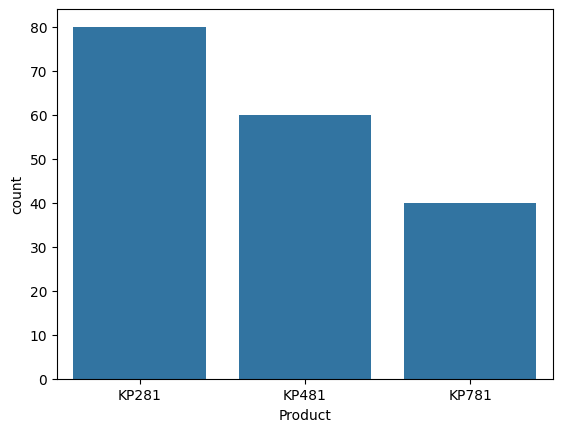

In [ ]:
#product analysis
sns.countplot(data=df,x='Product')
plt.show()

**KP281 is the most commonly purchase product type**

**KP481 is the second most top product type purchased**

**KP781 is the least purchased product type**

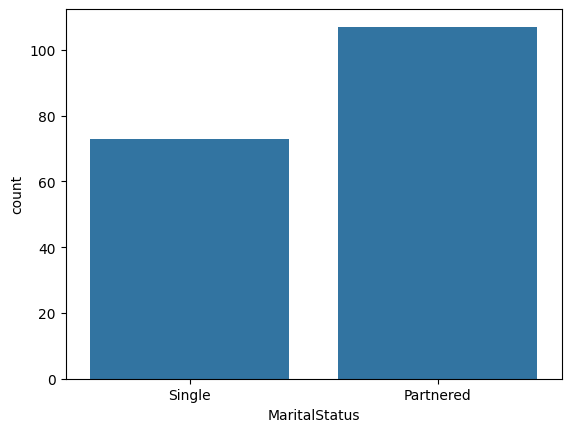

In [ ]:
# Marital Status Analysis - Count plot
sns.countplot(data=df,x='MaritalStatus')
plt.show()

Most products purchased by couples/Married/Partnered customer category

<function matplotlib.pyplot.show(close=None, block=None)>

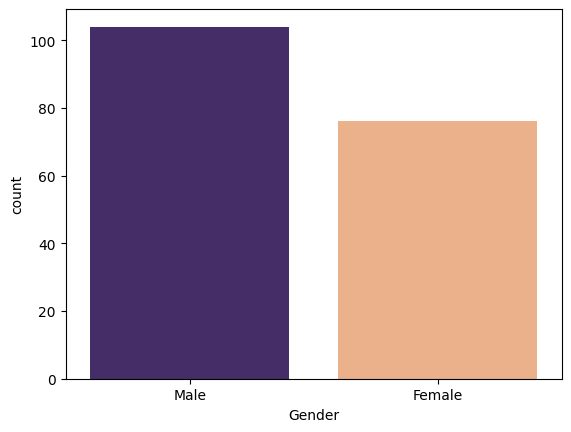

In [ ]:
# Gender Analysis - Count Plot
sns.countplot(data=df,x='Gender',palette=['#432371',"#FAAE7B"])
plt.show

**Most products purchased by Males, females are less interested in the product compared to Males**

<function matplotlib.pyplot.show(close=None, block=None)>

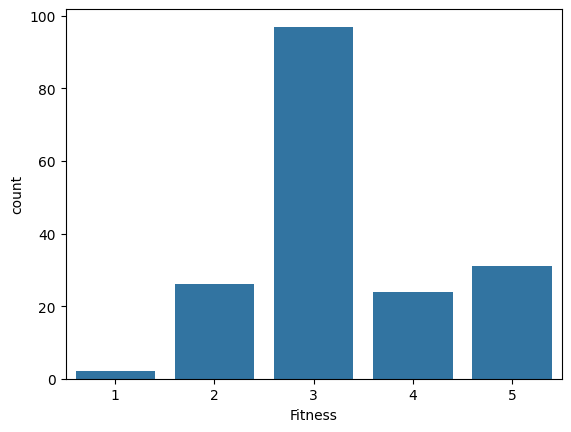

In [ ]:
# Fitness rating analysis - count plot
sns.countplot(data=df,x='Fitness')
plt.show

**More than 90 customers have rated their physical fitness rating as Average**

**Excellent shape is the second highest rating provided by the customers**

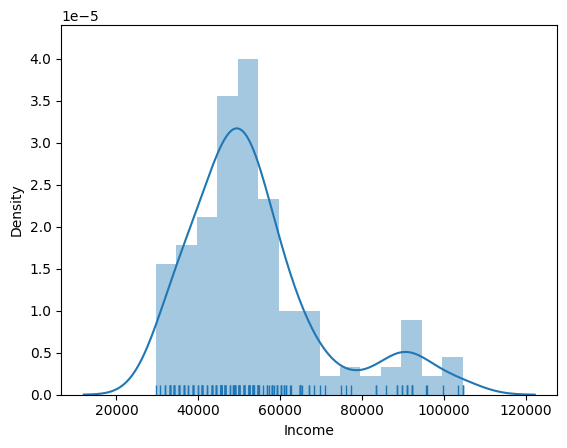

In [ ]:
# Income Analysis - Distplot
sns.distplot(df.Income,rug=True)
plt.show()

**Most of customers who have purchased the product have a average income between 40K to 60K**

**Average Income density is over 3.0**

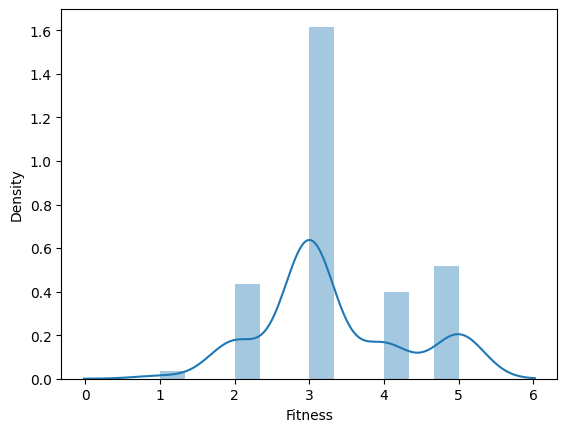

In [ ]:
# Fitness Rating Analysis - Distplot
sns.distplot(df.Fitness)
plt.show()

**Over 1.5 density customer population have rated their physical fitness rating as Average**

**Second highest customer population density have rated Excellent shape as their fitness rating**

<Axes: xlabel='Income', ylabel='Count'>

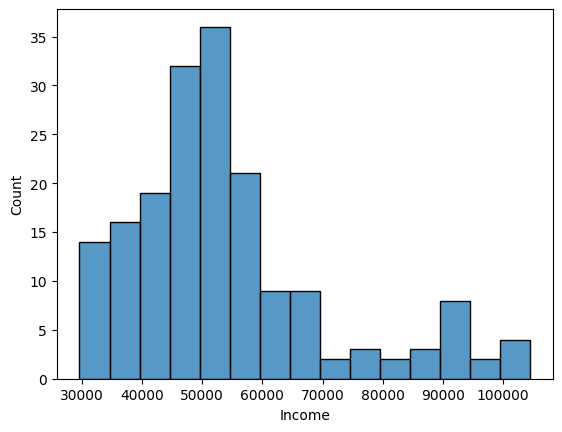

In [ ]:
# Income Analysis - Histogram
sns.histplot(data=df,x='Income')

More than 35 customers earn 50-55K per year

More than 30 customers earn 45-50K per year

More than 20 customers earn 55-60K per year

**For categorical variable(s): Boxplot**

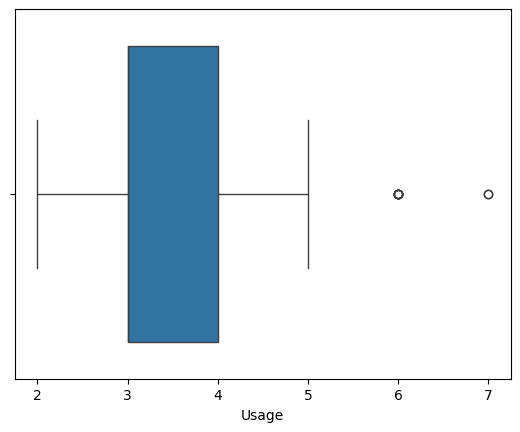

In [ ]:
# Usage Analysis - Box plot
sns.boxplot(data=df,x='Usage')
plt.show()

**3 to 4 days is the most preferred usage days for customers**

**6 and 7 days per week is roughly the usage days for few customers (Outliers)**

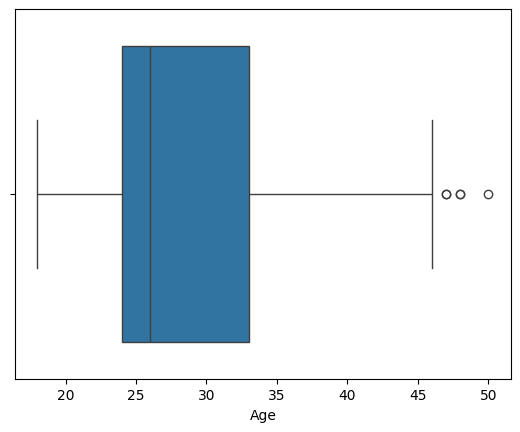

In [ ]:
# Age Analysis - Box plot
sns.boxplot(data=df,x='Age')
plt.show()

**23 to 34 is the most common customer age group that has purchased the product**

**Above 45 years old customers are very few compared to the young age group given in the datase**t

**For correlation: Heatmaps, Pairplots**

In [ ]:
import copy
df_copy = copy.deepcopy(df)

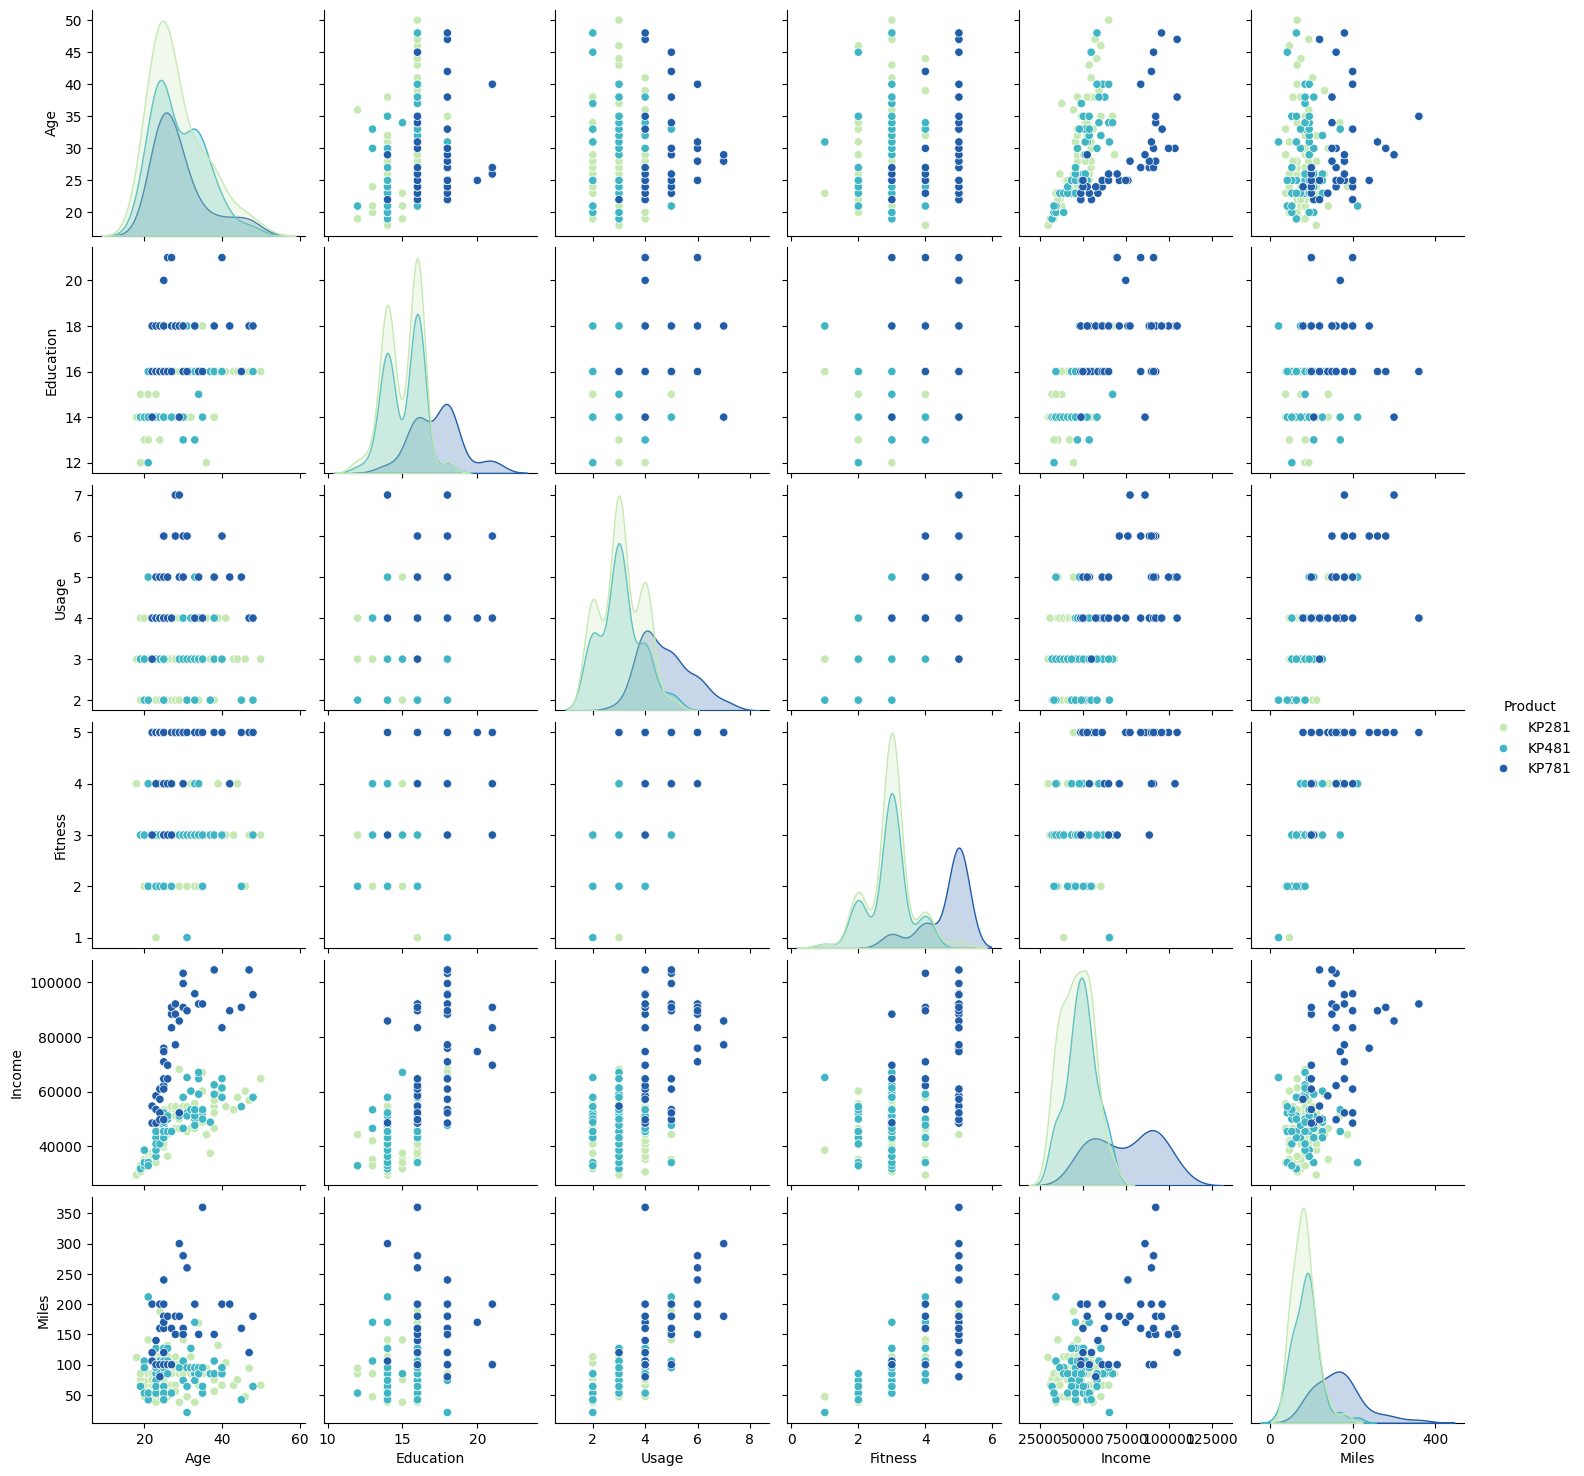

In [ ]:
sns.pairplot(df_copy, hue ='Product', palette= 'YlGnBu')
plt.show()

In [ ]:
df_copy['Usage'] = df_copy['Usage'].astype('int')
df_copy['Fitness'] = df_copy['Fitness'].astype('int')

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


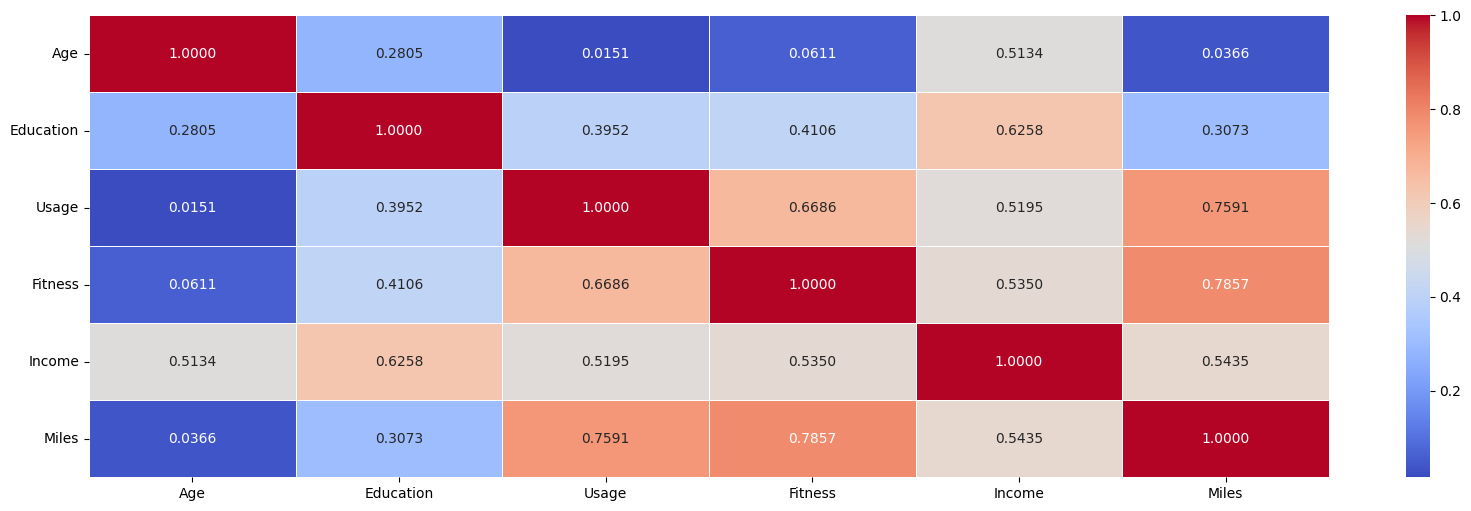

In [ ]:
#Correlation HeatMap
plt.figure(figsize=(20,6))
ax = sns.heatmap(df.corr(numeric_only=True),annot=True,fmt='.4f',linewidths=.5,cmap='coolwarm')
plt.yticks(rotation=0)
plt.show()

In the above heatmap linear relationship between data points is evaluated

Correlation between Age and Miles is 0.03

Correlation between Education and Income is 0.62

Correlation between Usage and Fitness is 0.66

Correlation between Fitness and Age is 0.06

Correlation between Income and Usage is 0.51

Correlation between Miles and Age is 0.03

**Bivariate Analysis**

In [ ]:
# Average usage of each product type by the customer
df.groupby('Product')['Usage'].mean()

Product
KP281    3.087500
KP481    3.066667
KP781    4.775000
Name: Usage, dtype: float64

Mean usage for product KP281 is 3.08

Mean usage for product KP481 is 3.06

Mean usage for product KP781 is 4.77

In [ ]:
# Average Education of customer using each product
df.groupby('Product')['Education'].mean()

Product
KP281    15.037500
KP481    15.116667
KP781    17.325000
Name: Education, dtype: float64

Mean Education qualification of the customer who purchased product KP281 is 15.03

Mean Education qualification of the customer who purchased product KP481 is 15.11

Mean Education qualification of the customer who purchased product KP781 is 17.32

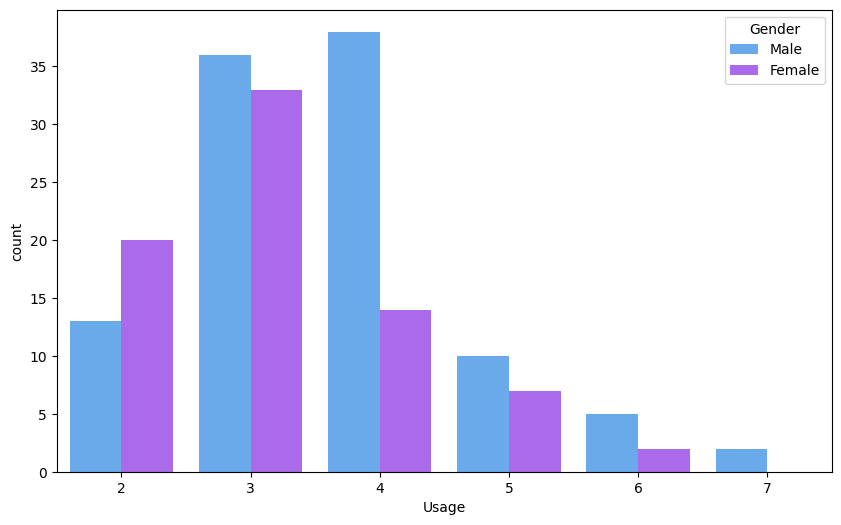

In [ ]:
# Purchased product usage among Gender
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Usage',hue='Gender',palette='cool')
plt.show()

Among Male and Female genders, Male's usage is 4 days per week

Female customers mostly use 3 days per week

Only few Male customers use 7 days per week whereas female customer's maximum usage is only 6 days per week

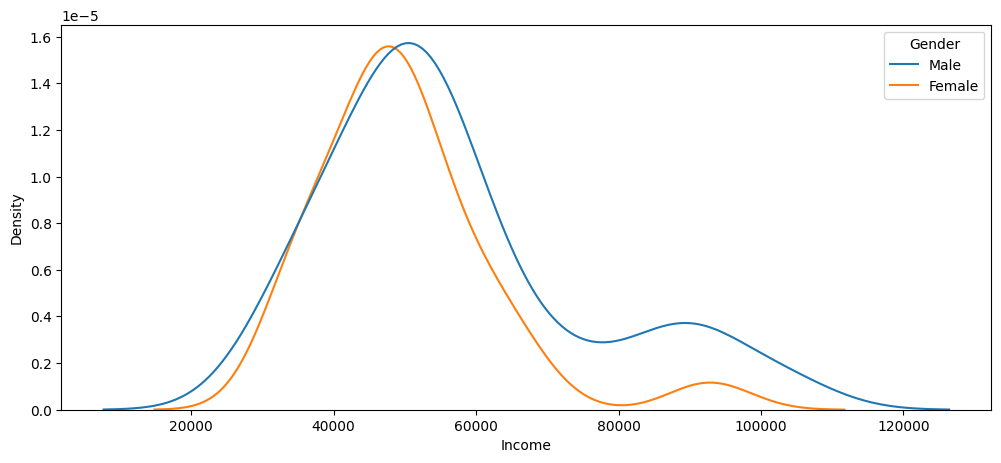

In [ ]:
# Product purchased Customers Income and their Gender
plt.figure(figsize=(12,5))
sns.kdeplot(data=df,x='Income',hue='Gender')
plt.show()

From the above diagram, we can conclude the spike from 40K to around 80K is the most common income per annum of the customers

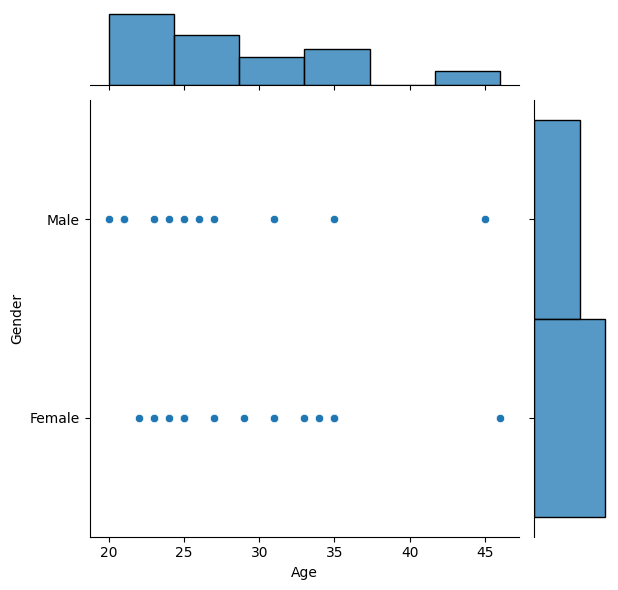

In [ ]:
# Scatterplot for customers Gender and Age who rated less than 2 in Fitness rating
sns.jointplot(x='Age',y='Gender',data=df[df.Fitness<3])
plt.show()

Above Joint plot describes the relationship between the customer age and their gender grouping.

**Product is not familiar with older or middle age womens**

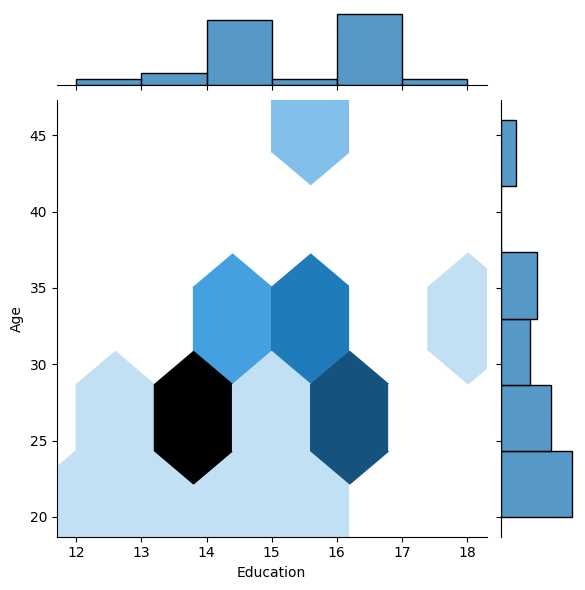

In [ ]:
# Hex Scatterplot for customers Education and Age who rated less than 2 in Fitness rating
sns.jointplot(x='Education',y='Age',kind='hex',data=df[df.Fitness<3])
plt.show()

**Majority of the age and education density falls on 25-30 age group and 13-14 education**

**Computing Probability - Marginal, Conditional Probability**

**Probability of product purchase w.r.t. gender**

In [ ]:
pd.crosstab(index =df['Product'],columns = df['Gender'],margins = True,normalize = True ).round(2)

Gender,Female,Male,All
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
All,0.42,0.58,1.00


Insights

The Probability of a treadmill being purchased by a female is 42%.

The conditional probability of purchasing the treadmill model given that the customer is female is

For Treadmill model KP281 - 22%

For Treadmill model KP481 - 16%

For Treadmill model KP781 - 4%

The Probability of a treadmill being purchased by a male is 58%.

The conditional probability of purchasing the treadmill model given that the customer is male is -

For Treadmill model KP281 - 22%

For Treadmill model KP481 - 17%

For Treadmill model KP781 - 18%

In [ ]:
#binning the age values into categories
bin_range1 = [17,25,35,45,float('inf')]
bin_labels1 = ['Young Adults', 'Adults', 'Middle Aged Adults', 'Elder']

df['age_group'] = pd.cut(df['Age'],bins = bin_range1,labels = bin_labels1)

#binning the education values into categories
bin_range2 = [0,12,15,float('inf')]
bin_labels2 = ['Primary Education', 'Secondary Education', 'Higher Education']

df['edu_group'] = pd.cut(df['Education'],bins = bin_range2,labels = bin_labels2)

#binning the income values into categories
bin_range3 = [0,40000,60000,80000,float('inf')]
bin_labels3 = ['Low Income','Moderate Income','High Income','Very High Income']

df['income_group'] = pd.cut(df['Income'],bins = bin_range3,labels = bin_labels3)

#binning the miles values into categories
bin_range4 = [0,50,100,200,float('inf')]
bin_labels4 = ['Light Activity', 'Moderate Activity', 'Active Lifestyle', 'Fitness Enthusiast ']

df['miles_group'] = pd.cut(df['Miles'],bins = bin_range4,labels = bin_labels4)

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,edu_group,income_group,miles_group
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adults,Secondary Education,Low Income,Active Lifestyle
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adults,Secondary Education,Low Income,Moderate Activity
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adults,Secondary Education,Low Income,Moderate Activity
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adults,Primary Education,Low Income,Moderate Activity
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adults,Secondary Education,Low Income,Light Activity


In [ ]:
#Probability of product purchase w.r.t. Age
pd.crosstab(index =df['Product'],columns = df['age_group'],margins = True,normalize = True ).round(2)

age_group,Young Adults,Adults,Middle Aged Adults,Elder,All
Product,,,,,
KP281,0.19,0.18,0.06,0.02,0.44
KP481,0.16,0.13,0.04,0.01,0.33
KP781,0.09,0.09,0.02,0.01,0.22
All,0.44,0.41,0.12,0.03,1.00


Insights
The Probability of a treadmill being purchased by a Young Adult(18-25) is 44%.

The conditional probability of purchasing the treadmill model given that the customer is Young Adult is

For Treadmill model KP281 - 19%

For Treadmill model KP481 - 16%

For Treadmill model KP781 - 9%

The Probability of a treadmill being purchased by a Adult(26-35) is 41%.

The conditional probability of purchasing the treadmill model given that the customer is Adult is -

For Treadmill model KP281 - 18%

For Treadmill model KP481 - 13%

For Treadmill model KP781 - 9%

The Probability of a treadmill being purchased by a Middle Aged(36-45) is 12%.

The Probability of a treadmill being purchased by a Elder(Above 45) is only 3%.

**Probability of product purchase w.r.t. Education level**

In [ ]:
pd.crosstab(index =df['Product'],columns = df['edu_group'],margins = True,normalize = True ).round(2)

edu_group,Primary Education,Secondary Education,Higher Education,All
Product,,,,
KP281,0.01,0.21,0.23,0.44
KP481,0.01,0.14,0.18,0.33
KP781,0.00,0.01,0.21,0.22
All,0.02,0.36,0.62,1.00


In [ ]:
pd.crosstab(index =df['Product'],columns = df['income_group'],margins = True,normalize = True ).round(2)

income_group,Low Income,Moderate Income,High Income,Very High Income,All
Product,,,,,
KP281,0.13,0.28,0.03,0.00,0.44
KP481,0.05,0.24,0.04,0.00,0.33
KP781,0.00,0.06,0.06,0.11,0.22
All,0.18,0.59,0.13,0.11,1.00


Insights

The Probability of a treadmill being purchased by a customer with Low Income(<40k) is 18%.

The conditional probability of purchasing the treadmill model given that the customer has Low Income is -
For Treadmill model KP281 - 13%

For Treadmill model KP481 - 5%

For Treadmill model KP781 - 0%

The Probability of a treadmill being purchased by a customer with Moderate Income(40k - 60k) is 59%.

The conditional probability of purchasing the treadmill model given that the customer has Moderate Income is -
For Treadmill model KP281 - 28%

For Treadmill model KP481 - 24%

For Treadmill model KP781 - 6%

The Probability of a treadmill being purchased by a customer with High Income(60k - 80k) is 13%

The conditional probability of purchasing the treadmill model given that the customer has High Income is -

For Treadmill model KP281 - 3%

For Treadmill model KP481 - 4%

For Treadmill model KP781 - 6%

The Probability of a treadmill being purchased by a customer with Very High Income(>80k) is 11%

The conditional probability of purchasing the treadmill model given that the customer has High Income is -

For Treadmill model KP281 - 0%

For Treadmill model KP481 - 0%

For Treadmill model KP781 - 11%

**Probability of product purchase w.r.t. Marital Status**

In [ ]:
pd.crosstab(index =df['Product'],columns = df['MaritalStatus'],margins = True,normalize = True ).round(2)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.27,0.18,0.44
KP481,0.20,0.13,0.33
KP781,0.13,0.09,0.22
All,0.59,0.41,1.00


**The Probability of a treadmill being purchased by a Married Customer is 59%.**

P**robability of product purchase w.r.t. weekly mileage**

In [ ]:
pd.crosstab(index =df['Product'],columns = df['miles_group'],margins = True,normalize = True ).round(2)

miles_group,Light Activity,Moderate Activity,Active Lifestyle,Fitness Enthusiast,All
Product,,,,,
KP281,0.07,0.28,0.10,0.00,0.44
KP481,0.03,0.22,0.08,0.01,0.33
KP781,0.00,0.04,0.15,0.03,0.22
All,0.09,0.54,0.33,0.03,1.00


The Probability of a treadmill being purchased by a customer with lifestyle of Light Activity(0 to 50 miles/week) is 9%.

The conditional probability of purchasing the treadmill model given that the customer has Light Activity Lifestyle is -

For Treadmill model KP281 - 7%

For Treadmill model KP481 - 3%

For Treadmill model KP781 - 0%

The Probability of a treadmill being purchased by a customer with lifestyle of Moderate Activity(51 to 100 miles/week) is 54%.

The conditional probability of purchasing the treadmill model given that the customer with lifestyle of Moderate Activity is -
For Treadmill model KP281 - 28%

For Treadmill model KP481 - 22%

For Treadmill model KP781 - 4%

The Probability of a treadmill being purchased by a customer has Active Lifestyle(100 to 200 miles/week) is 33%.

The conditional probability of purchasing the treadmill model given that the customer has Active Lifestyle is -
For Treadmill model KP281 - 10%

For Treadmill model KP481 - 8%

For Treadmill model KP781 - 15%

The Probability of a treadmill being purchased by a customer who is Fitness Enthusiast(>200 miles/week) is 3% only

**Customer Profiling**
Based on above analysis

**Probability of purchase of KP281 = 44%**

**Probability of purchase of KP481 = 33%**

**Probability of purchase of KP781 = 22%**

Customer Profile for KP281 Treadmill:

Age of customer mainly between 18 to 35 years with few between 35 to 50 years
Education level of customer 13 years and above
Annual Income of customer below USD 60,000
Weekly Usage - 2 to 4 times
Fitness Scale - 2 to 4
Weekly Running Mileage - 50 to 100 miles
Customer Profile for KP481 Treadmill:

Age of customer mainly between 18 to 35 years with few between 35 to 50 years
Education level of customer 13 years and above
Annual Income of customer between USD 40,000 to USD 80,000
Weekly Usage - 2 to 4 times
Fitness Scale - 2 to 4
Weekly Running Mileage - 50 to 200 miles
Customer Profile for KP781 Treadmill:

Gender - Male
Age of customer between 18 to 35 years
Education level of customer 15 years and above
Annual Income of customer USD 80,000 and above
Weekly Usage - 4 to 7 times
Fitness Scale - 3 to 5
Weekly Running Mileage - 100 miles and above

**Recommendations**

**Marketing Campaigns for KP781**

The KP784 model exhibits a significant sales disparity in terms of gender, with only 18% of total sales attributed to female customers. To enhance this metric, it is recommended to implement targeted strategies such as offering special promotions and trials exclusively designed for the female customers.

**Affordable Pricing and Payment Plans**

Given the target customer's age, education level, and income, it's important to offer the KP281 and KP481 Treadmill at an affordable price point. Additionally, consider providing flexible payment plans that allow customers to spread the cost over several months. This can make the treadmill more accessible to customers with varying budgets.

**User-Friendly App Integration**

Create a user-friendly app that syncs with the treadmill. This app could track users' weekly running mileage, provide real-time feedback on their progress, and offer personalized recommendations for workouts based on their fitness scale and goals.This can enhance the overall treadmill experience and keep users engaged.